# Modeling



In [48]:
import os

import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier # <- extreme gradient boosting model
from sklearn.preprocessing import OrdinalEncoder

from xgboost import plot_importance

set_config(display='diagram')   

LABEL_COLUMN = "churned"

# Load Dataset

In [7]:
train = pd.read_csv('../data/users_train.csv')
test = pd.read_csv('../data/users_test.csv')

x_train, y_train = train.drop(columns=[LABEL_COLUMN]), train[LABEL_COLUMN]
x_test, y_test = test.drop(columns=[LABEL_COLUMN]), test[LABEL_COLUMN]

scale_pos_weight = 1/y_train.mean()

# Modelos boosting

## Solo variables numericas
### Tranformer

In [8]:
NUMERICAL_COLUMNS = [
    "cnt_user_engagement",
    "cnt_level_start_quickplay",
    "cnt_level_end_quickplay",
    "cnt_level_complete_quickplay",
    "cnt_level_reset_quickplay",
    "cnt_post_score",
    "cnt_spend_virtual_currency",
    "cnt_ad_reward",
    "cnt_challenge_a_friend",
    "cnt_completed_5_levels",
    "cnt_use_extra_steps",
]
IGNORE_COLUMNS = [
    "user_first_engagement",
    "user_pseudo_id",
    "is_enable",
    "bounced",
    "device_lang",
    "country_name",
    "device_os",
    "device_lang",
]

transformer_numeric = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("scaler", preprocessing.StandardScaler()),
    ]
)
transformer_pipeline = ColumnTransformer(
    transformers=[
        ("numeric_features", transformer_numeric, NUMERICAL_COLUMNS),
        ("ignore_features", "drop", IGNORE_COLUMNS),
    ]
)


### Extream gradient boosting
En este caso en lugar de usar un modelo lineal puedes probar uno de boosting `XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=42,)`


In [9]:
xgb_model = Pipeline(
    steps=[
        ('preprocessor', transformer_pipeline),
        ('classifier', XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=42,))
    ]
)
xgb_model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_features', ...), ('ignore_features', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Evaluation

              precision    recall  f1-score   support

           0       0.85      0.63      0.72       614
           1       0.34      0.64      0.45       185

    accuracy                           0.63       799
   macro avg       0.60      0.64      0.58       799
weighted avg       0.74      0.63      0.66       799



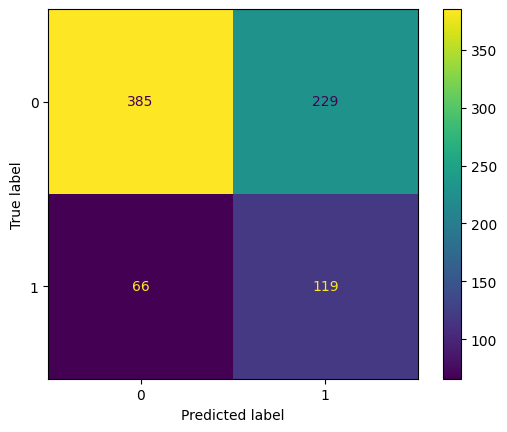

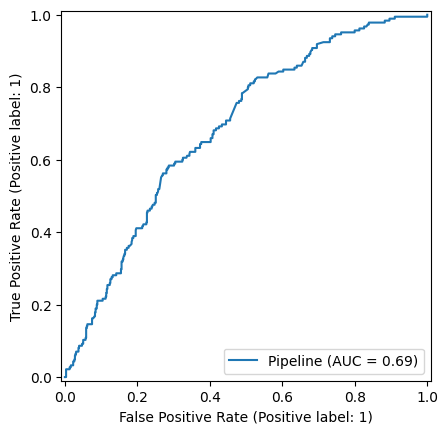

In [10]:
x = x_test
y = y_test
model = xgb_model

y_pred = model.predict(x)
print(metrics.classification_report(y, y_pred))

metrics.ConfusionMatrixDisplay.from_estimator(model, x, y)

f, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(model, x, y, ax=ax)

## Numerical and Categorical features

### Transformer
El poder construir pipeline nos permite fácilmente experimentar muy rápido el efecto de las features que usamos así como las transformaciones que realizamos sobre estas.

In [11]:
CATEGORICAL_COLUMNS = [
    "country_name",
    "device_os",
    "device_lang",
]
NUMERICAL_COLUMNS = [
    "cnt_user_engagement",
    "cnt_level_start_quickplay",
    "cnt_level_end_quickplay",
    "cnt_level_complete_quickplay",
    "cnt_level_reset_quickplay",
    "cnt_post_score",
    "cnt_spend_virtual_currency",
    "cnt_ad_reward",
    "cnt_challenge_a_friend",
    "cnt_completed_5_levels",
    "cnt_use_extra_steps",
]
IGNORE_COLUMNS = [
    "user_first_engagement",
    "user_pseudo_id",
    "is_enable",
    "bounced",
    "device_lang",
]

transformer_numeric = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("scaler", preprocessing.StandardScaler()),
    ]
)
transformer_categorical = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one-hot", preprocessing.OneHotEncoder(handle_unknown="ignore")),
    ]
)
transformer_pipeline = ColumnTransformer(
    transformers=[
        ("numeric_features", transformer_numeric, NUMERICAL_COLUMNS),
        ("categorical_features", transformer_categorical, CATEGORICAL_COLUMNS),
        ("ignore_features", "drop", IGNORE_COLUMNS),
    ]
)

### Modeling

In [75]:
xgb_model_full = Pipeline(
    steps=[
        ('preprocessor', transformer_pipeline),
        ('classifier', XGBClassifier(
            scale_pos_weight=scale_pos_weight,
            random_state=42,
            ))
    ]
)
xgb_model_full.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_features', ...), ('categorical_features', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


### Evaluation

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       614
           1       0.34      0.62      0.44       185

    accuracy                           0.63       799
   macro avg       0.59      0.63      0.58       799
weighted avg       0.73      0.63      0.66       799



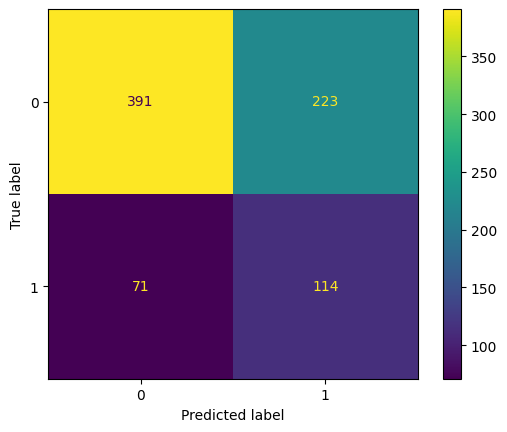

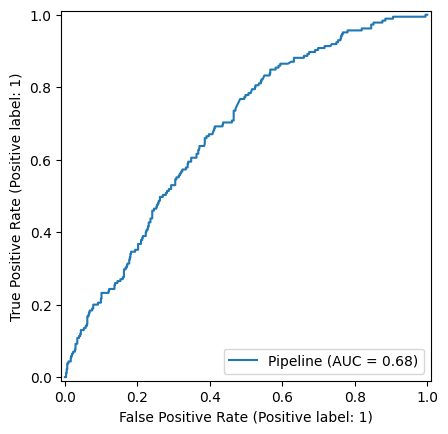

In [76]:
x = x_test
y = y_test
model = xgb_model_full

y_pred = model.predict(x)
print(metrics.classification_report(y, y_pred))

metrics.ConfusionMatrixDisplay.from_estimator(model, x, y)

f, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(model, x, y, ax=ax)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

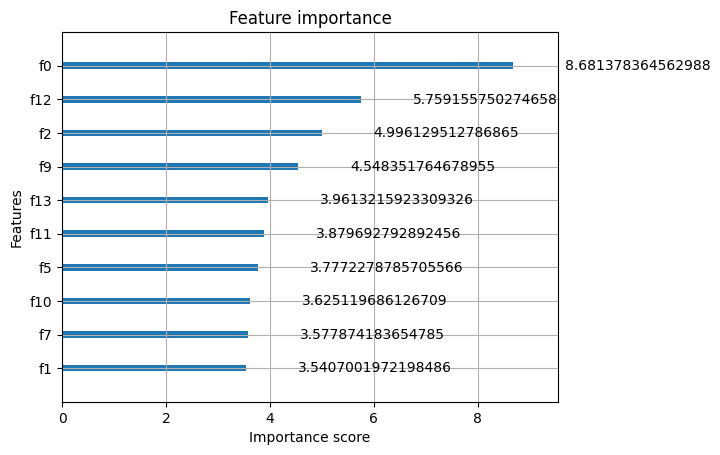

In [77]:
plot_importance(model.named_steps["classifier"], importance_type='gain', max_num_features=10)

In [78]:
xgb_model_full.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [79]:
xgb_model_full.predict_proba(x_test)[:,1]

array([1.48225695e-01, 3.50176059e-02, 2.47393851e-03, 6.45971954e-01,
       2.97353387e-01, 3.50176059e-02, 4.33524102e-01, 6.08090460e-01,
       1.20957546e-01, 7.68210217e-02, 3.48611087e-01, 4.72930670e-01,
       3.50176059e-02, 5.75521052e-01, 7.19803452e-01, 7.03332901e-01,
       5.61685979e-01, 8.33728015e-01, 5.14488459e-01, 3.60836655e-01,
       7.51263678e-01, 5.62816322e-01, 7.00558275e-02, 7.56242156e-01,
       1.99550036e-02, 1.72450915e-01, 1.11414336e-01, 1.49585426e-01,
       2.21647620e-01, 5.98143816e-01, 8.45798790e-01, 5.32342076e-01,
       1.40425982e-03, 1.48169935e-01, 5.07157631e-02, 7.20234334e-01,
       3.86453271e-01, 5.11767901e-02, 5.05202532e-01, 7.90967464e-01,
       4.67680007e-01, 5.18571258e-01, 4.09559757e-01, 1.73387200e-01,
       7.73618042e-01, 4.58782554e-01, 3.53275478e-01, 7.96870366e-02,
       9.20205116e-01, 9.59437266e-02, 6.22474015e-01, 3.21805924e-01,
       2.22537969e-03, 2.98417181e-01, 8.73574018e-01, 5.52540600e-01,
      

## Numerical and Categorical features with native categorical features

### Transformer
El poder construir pipeline nos permite fácilmente experimentar muy rápido el efecto de las features que usamos así como las transformaciones que realizamos sobre estas.

In [82]:
CATEGORICAL_COLUMNS = [
    "country_name",
    "device_os",
    "device_lang",
]
NUMERICAL_COLUMNS = [
    "cnt_user_engagement",
    "cnt_level_start_quickplay",
    "cnt_level_end_quickplay",
    "cnt_level_complete_quickplay",
    "cnt_level_reset_quickplay",
    "cnt_post_score",
    "cnt_spend_virtual_currency",
    "cnt_ad_reward",
    "cnt_challenge_a_friend",
    "cnt_completed_5_levels",
    "cnt_use_extra_steps",
]
IGNORE_COLUMNS = [
    "user_first_engagement",
    "user_pseudo_id",
    "is_enable",
    "bounced",
    "device_lang",
]

transformer_numeric = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("scaler", preprocessing.StandardScaler()),
    ]
)
transformer_categorical = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)),
    ]
)
transformer_pipeline = ColumnTransformer(
    transformers=[
        ("numeric_features", transformer_numeric, NUMERICAL_COLUMNS),
        ("categorical_features", transformer_categorical, CATEGORICAL_COLUMNS),
        ("ignore_features", "drop", IGNORE_COLUMNS),
    ],
    verbose_feature_names_out=False  # Keep original feature names
)

# Create feature types list for XGBoost
# Order: numerical features first, then categorical features
feature_types = (["q"] * len(NUMERICAL_COLUMNS)) + (["c"] * len(CATEGORICAL_COLUMNS))

### Modeling

In [83]:
xgb_model_full = Pipeline(
    steps=[
        ('preprocessor', transformer_pipeline),
        ('classifier', XGBClassifier(
            scale_pos_weight=scale_pos_weight,
            random_state=42,
            enable_categorical=True,
            feature_types=feature_types
        ))
    ]
)
xgb_model_full.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_features', ...), ('categorical_features', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


### Evaluation

              precision    recall  f1-score   support

           0       0.84      0.67      0.75       614
           1       0.35      0.58      0.44       185

    accuracy                           0.65       799
   macro avg       0.60      0.63      0.59       799
weighted avg       0.73      0.65      0.68       799



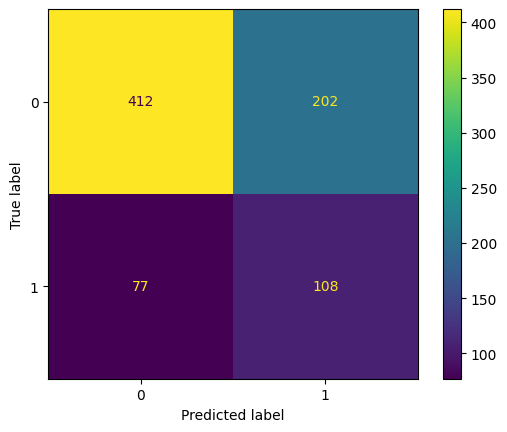

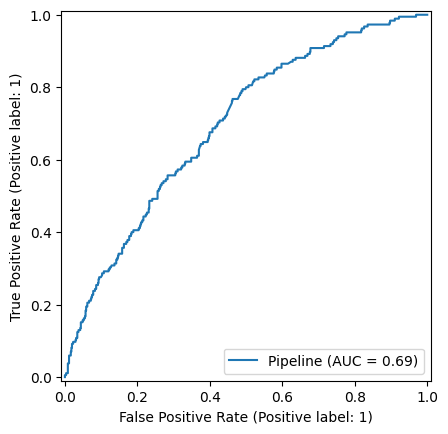

In [84]:
x = x_test
y = y_test
model = xgb_model_full

y_pred = model.predict(x)
print(metrics.classification_report(y, y_pred))

metrics.ConfusionMatrixDisplay.from_estimator(model, x, y)

f, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(model, x, y, ax=ax)

In [85]:
model.named_steps["preprocessor"].get_feature_names_out()

array(['cnt_user_engagement', 'cnt_level_start_quickplay',
       'cnt_level_end_quickplay', 'cnt_level_complete_quickplay',
       'cnt_level_reset_quickplay', 'cnt_post_score',
       'cnt_spend_virtual_currency', 'cnt_ad_reward',
       'cnt_challenge_a_friend', 'cnt_completed_5_levels',
       'cnt_use_extra_steps', 'country_name', 'device_os', 'device_lang'],
      dtype=object)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

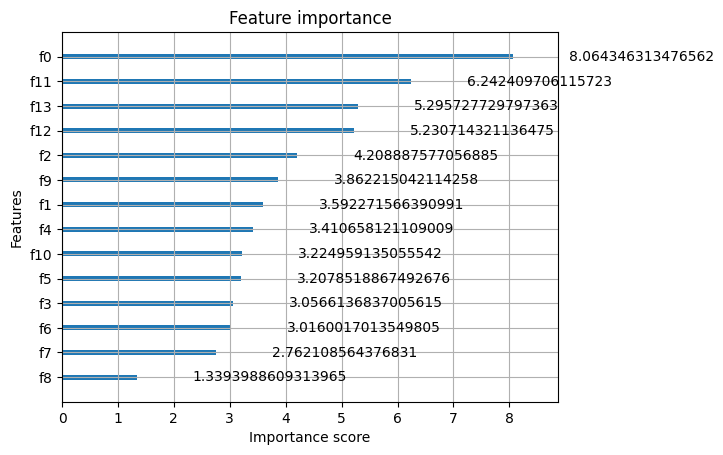

In [86]:

plot_importance(model.named_steps["classifier"], importance_type='gain')

In [87]:
xgb_model_full.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [88]:
xgb_model_full.predict_proba(x_test)[:,1]

array([1.74878195e-01, 2.75272150e-02, 2.96467892e-03, 5.77925622e-01,
       3.08814555e-01, 2.75272150e-02, 3.81457627e-01, 9.22065675e-01,
       2.04005986e-01, 5.15553541e-02, 3.34092766e-01, 4.44878995e-01,
       2.75272150e-02, 6.88311636e-01, 7.44675636e-01, 7.22936809e-01,
       6.39915526e-01, 8.72647107e-01, 7.12011009e-02, 4.81499553e-01,
       8.13861728e-01, 5.28433681e-01, 2.61245500e-02, 6.35313272e-01,
       3.06825526e-02, 2.79802419e-02, 2.71135330e-01, 1.18205650e-02,
       2.73259044e-01, 6.80804372e-01, 7.61817455e-01, 4.87469763e-01,
       1.25169230e-03, 1.31012663e-01, 1.24006858e-02, 6.30268693e-01,
       3.80396336e-01, 1.34765401e-01, 4.02949989e-01, 5.95979035e-01,
       2.11582199e-01, 6.46140456e-01, 5.77386260e-01, 1.10821269e-01,
       6.01635873e-01, 2.79371500e-01, 4.77374405e-01, 1.29360154e-01,
       4.14585143e-01, 2.49561310e-01, 8.76798630e-02, 3.01710725e-01,
       2.58416147e-03, 8.75882432e-02, 2.68155158e-01, 6.33924782e-01,
      

## Save model 

In [89]:
model_path = 'models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

joblib.dump(xgb_model_full, f'{model_path}/xgb_model_full.joblib')

['models/xgb_model_full.joblib']